## **Notebook Prepared by:**

Alamay, Carl Justine

Villarama, Kenn Michael

Wang, Vince Ryan

**Section: S11**


# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn import preprocessing
from scipy.stats import pearsonr

# Accessing CSV dataset File

In [2]:
file_id = '1hSFOiF5dg7tu3v8WF3LxU2YxXp_EwsWy'
url = 'https://drive.google.com/uc?id={}'.format(file_id)
sugar_df = pd.read_csv(url)


# **Section 1.** **Description of the Dataset**

The dataset, known as the Pima Indian Diabetes Dataset, was curated by the *National Institute of Diabetes and Digestive and Kidney Diseases* with a primary goal of facilitating the prediction of diabetes in patients. It is derived from a larger database, with selection criteria that ensured the inclusion of specific demographics: exclusively Pima Indigenous women who are 21 years of age or older. Pima Indians are a Native American group that lives in Mexico and Arizona, USA (Schulz, 2006). Moreover, this group of women was discovered to have a high incidence rate of diabetes mellitus. Therefore, research around them was thought to be significant and representative of global health. Furthermore, this group is also particularly important to members of underrepresented minority or indigenous groups. This subset was carefully chosen to provide a focused and relevant dataset for diabetes prediction research. The data collection process involved periodic studies of the Pima Indigenous women's population, conducted every two years by the National Institute of Diabetes and Digestive and Kidney Diseases, starting from 1965. The dataset is rich in information vital for estimating the likelihood of diabetes in individuals, offering a valuable resource for medical research and analysis.

When considering the implications of the data collection method on the generated conclusions and insights from the 768 women dataset, it's essential to recognize the specificity and contextual limitations of the research. The dataset's concentration on a specific demographic in Pima Indigenous women aged 21 and above inherently carries the risk of limiting the applicability of the findings to broader populations. This focused approach provides deep insights into the diabetes mellitus incidence within this group, enabling tailored healthcare interventions. However, the unique genetic and environmental contexts of the Pima Indigenous women implicate that the conclusions drawn may not be directly applicable to other populations or ethnic groups without adjustments or further comparative analysis.

## **Tasks:** Data Cleaning, Exploratory Data Analysis & Formulating Research Question

As an introduction, we can observe what the data frame looks like by calling the `sugar_df` data frame.

In [3]:
sugar_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


The diabetes dataset comprises `768 entries spread across 9 columns`. This dataset encapsulates critical data pertaining to 768 Pima Indian Women, with each row dedicated to the health information of an individual woman. The columns within this dataset hold key information instrumental for the precise prediction of diabetes presence among these individuals. Further exploration will delve into the specifics of these features to understand their significance in diabetes prediction. The binary classification outcome variable takes (0 or 1) values, where 0 indicates a negative test for diabetes, and 1 implies a positive test.

In the given dataset, the features are as follows:

* **Pregnancies** – To express the number of pregnancies experienced

* **Glucose** – To express the concentration of blood plasma glucose (two hours after drinking a glucose solution)

* **BloodPressure** -To express the Blood pressure measurement, which is the diastolic blood pressure in mmHg

* **SkinThickness** – To express the thickness of the skin, specifically triceps skin fold thickness in mm

* **Insulin** – To express the Insulin level in blood (two hours after drinking glucose solution)

* **BMI** – To express the Body mass index

* **DiabetesPedigreeFunction** – To express the Diabetes percentage (relates to the extent to which an individual has some kind of hereditary or genetic risk of diabetes higher than the norm)

* **Age** – To express the age in years

* **Outcome** – To express the final result 1 indicates diabetes and 0 indicates without diabetes

The dataset is accessible in : [Diabetes Dataset from Kaggle](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset/data)


We can use the `info()` method to check for the information about our dataset. As seen in the output, there are a total of 768 observations in the data set. There are also 9 distinct features with appropriate data types for each of them. Additionally, there are no missing values present in the data frame.

In [4]:
sugar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Since the outcome is the main focus of this dataset, we can find the count of the two outcomes using a condition and a `sum()` method. After running the code block, it can be seen that the number of outcomes for no diabetes is 500 while the presence of diabetes is 268.

In [5]:
zero_outcome = (sugar_df[['Outcome']] == 0).sum()
one_outcome = (sugar_df[['Outcome']] == 1).sum()

print('Number of Outcome is 0:')
print(zero_outcome, '\n')
print('Number of Outcome is 1:')
print(one_outcome)

Number of Outcome is 0:
Outcome    500
dtype: int64 

Number of Outcome is 1:
Outcome    268
dtype: int64


# **Section 2.** **Data Cleaning**

Data cleaning is a crucial first step before analyzing data. It's about making sure the data is good to use by fixing errors like missing values, getting rid of duplicates, and spotting any odd data points (outliers). We can then clean up the data, making it ready for analysis. This step is particularly essential because it helps make sure our findings are accurate.

We first assess if the dataset has any null values that are present anywhere within the features. As observed by using `isnull()` and `any()`, there are not any existing null values that could affect our analysis.

In [6]:
sugar_df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Then we check if there are duplicates that exist within the data entries using the block of code below. Based on the output by using `duplicated()`, there does not seem to be any entries that have duplicates.

In [7]:
sugar_df[sugar_df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Another step would be to check if there are any 0 values that would not make sense given the following feature. We can get the `sum()` of the features equal to 0 `df == 0` within the dataframe. As seen from the output, there do seem to be 0 values for features that do not make sense for it to have them.

In [8]:
(sugar_df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Chang et al. (2022) states that according to domain knowledge by Aada & Tirwani (2019), there are inconsistent values for the attributes, wherein **zero values** are **not within the normal range** and are therefore inaccurate. These features are namely:

* **Glucose** – A blood glucose level of 0 would imply a non-viable condition, as glucose is critical for bodily functions, and such a reading typically indicates a measurement error or device malfunction.

* **BloodPressure** - A blood pressure of 0 mmHg would imply the absence of any blood circulation, a state incompatible with living.

* **SkinThickness** – A 0 mm triceps skin fold thickness would imply an unrealistic measurement, suggesting either an error in measurement technique or an anomaly in data recording.

* **Insulin** – A 0 insulin level would imply a critical medical condition requiring immediate treatment to sustain life.

* **BMI** – A BMI of 0 would imply an impossible physical condition as it needs the measurements of height and weight which is not possible to be measured as 0.

Checking for outliers would also be a wise step before conducting any data imputation. This is because some features might have their distributions affected significantly by the presence of outliers. Outliers can lead to a misleading representation of the data's central tendency and variability, which are crucial factors in determining the most appropriate imputation method for missing values (e.g. mean, median or mode).

Splitting the dataset based on the outcome would also be a sensible decision for data preprocessing since there would be certain implications for data imputation within the features when an outcome indicates the presence of diabetes or not.

In [9]:
outcomezero_df = sugar_df[sugar_df['Outcome']==0].copy()
outcomezero_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               500 non-null    int64  
 1   Glucose                   500 non-null    int64  
 2   BloodPressure             500 non-null    int64  
 3   SkinThickness             500 non-null    int64  
 4   Insulin                   500 non-null    int64  
 5   BMI                       500 non-null    float64
 6   DiabetesPedigreeFunction  500 non-null    float64
 7   Age                       500 non-null    int64  
 8   Outcome                   500 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 39.1 KB


In [10]:
outcomeone_df = sugar_df[sugar_df['Outcome']==1].copy()
outcomeone_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               268 non-null    int64  
 1   Glucose                   268 non-null    int64  
 2   BloodPressure             268 non-null    int64  
 3   SkinThickness             268 non-null    int64  
 4   Insulin                   268 non-null    int64  
 5   BMI                       268 non-null    float64
 6   DiabetesPedigreeFunction  268 non-null    float64
 7   Age                       268 non-null    int64  
 8   Outcome                   268 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 20.9 KB


In [11]:
features = ['Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
outcomezero_df.loc[:, features]= outcomezero_df [features].replace(0, np.NaN)
outcomeone_df.loc[:, features]= outcomeone_df [features].replace(0, np.NaN)

In [12]:
outcomezero_df.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [13]:
outcomeone_df.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

We can check the distributions of these features through a histogram by `hist()` in order to check their respective skewness. This would also help in terms of choosing the sensible data imputation method.

Upon checking the histograms of each outcome, it is evident that the dataset does not generally have normal distribution for its features given the outcome.

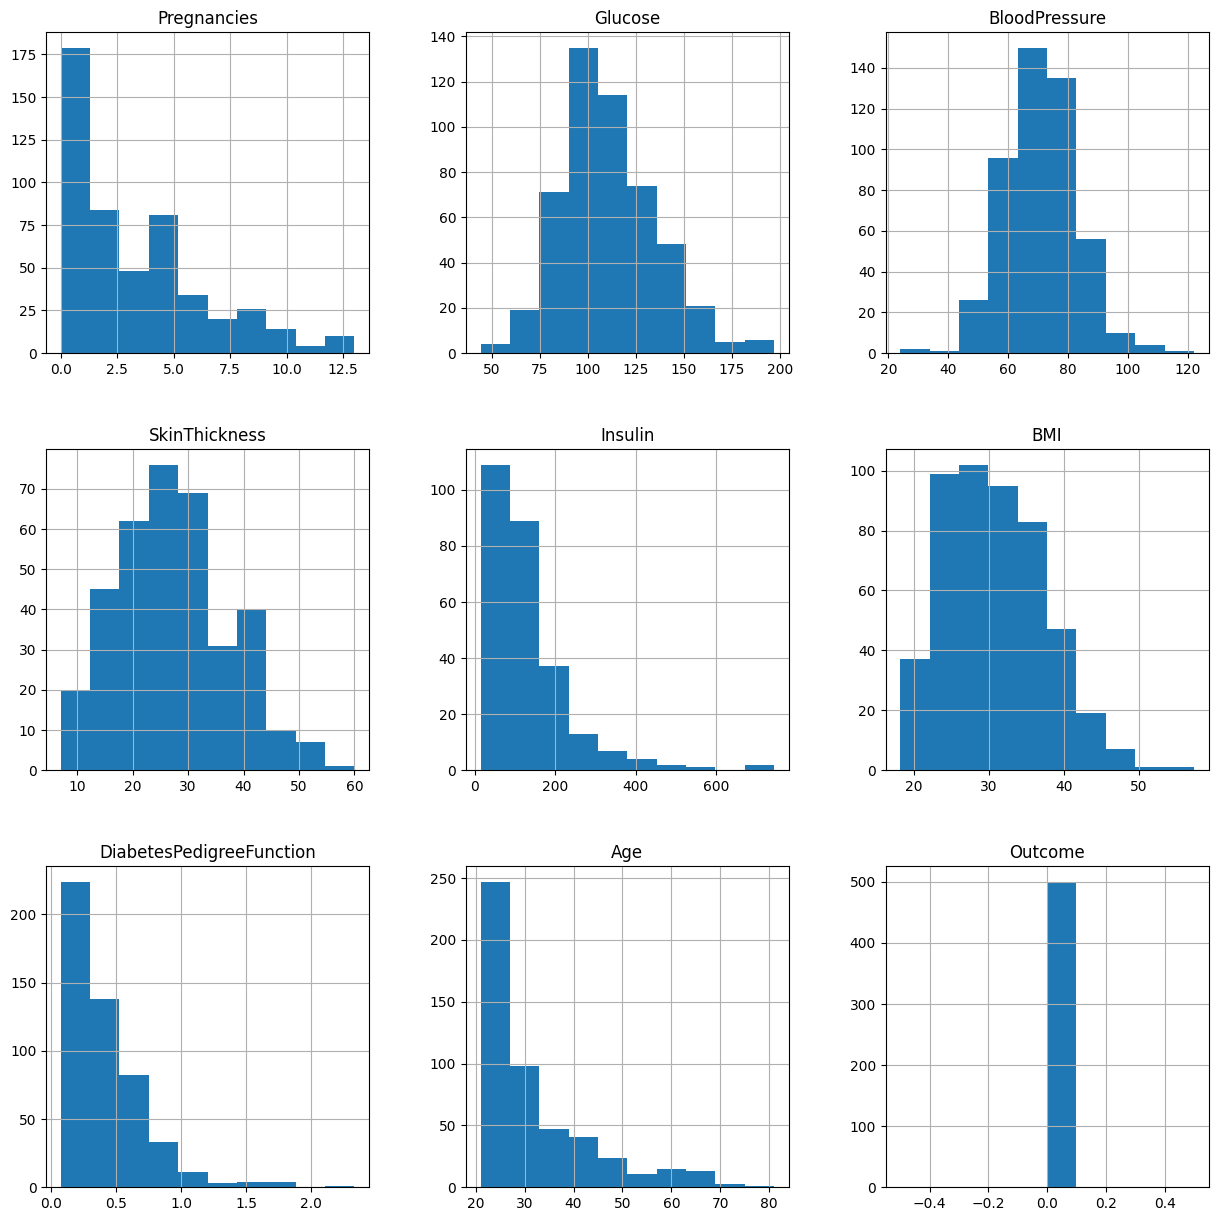

In [14]:
outcomezero_plot = outcomezero_df.hist(figsize = (15,15))

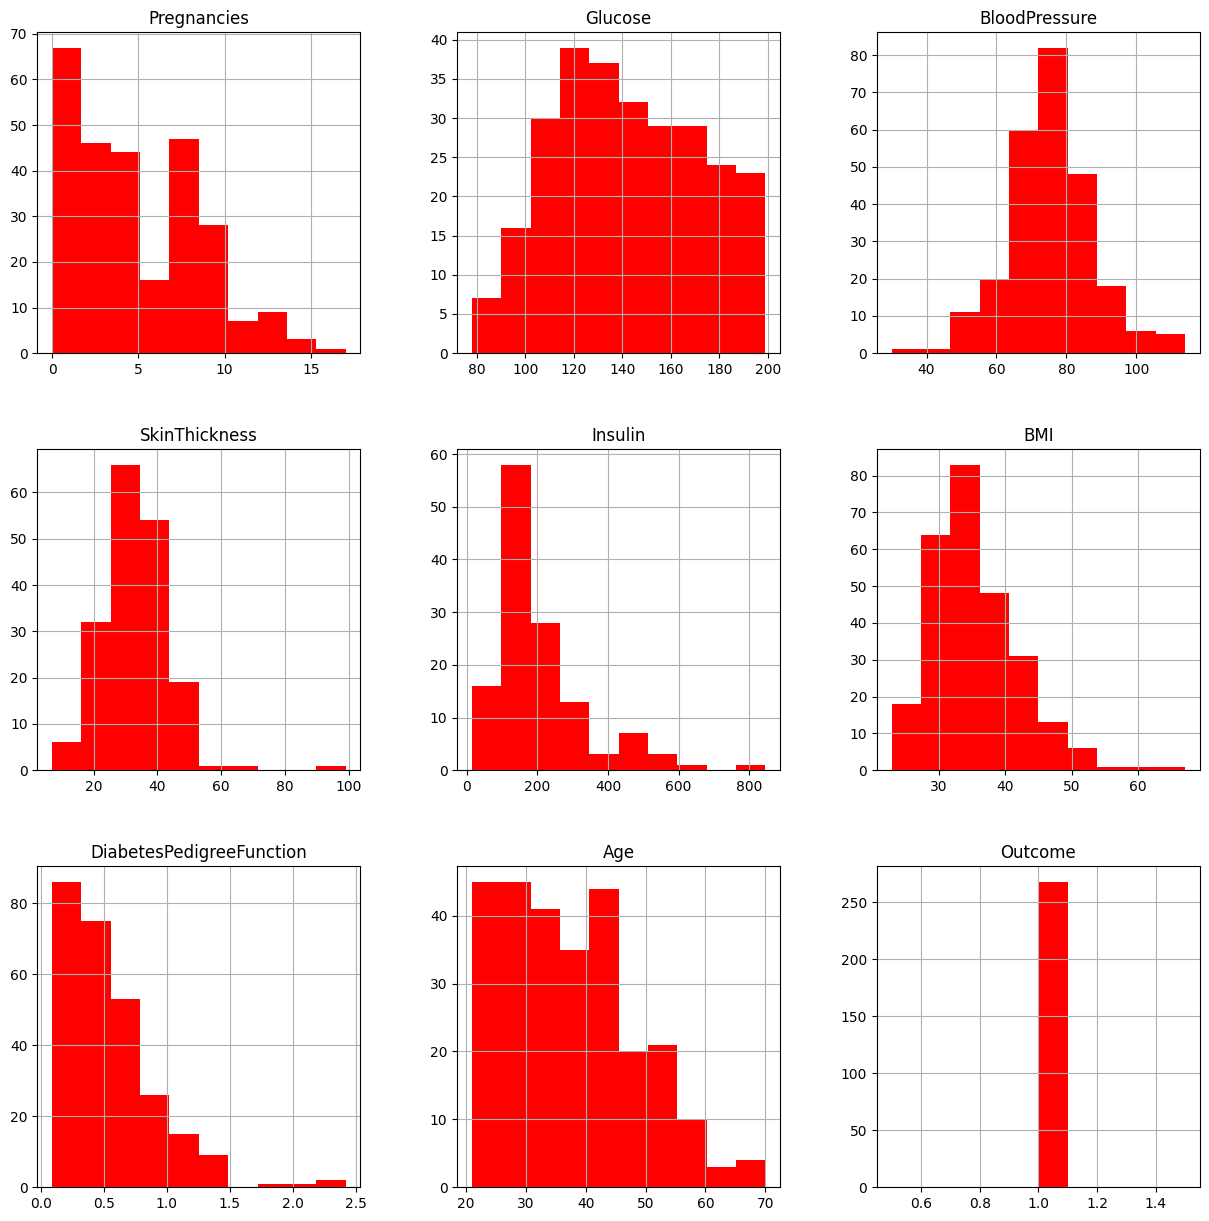

In [15]:
outcomeone_plot = outcomeone_df.hist(figsize = (15,15), color='red')

Furthermore, we can check if outliers exist through a boxplot. We can use `boxplot()` method for the dataframe and indicate the feature that we would like to explore their respective boxplots.

In [16]:
features1 = ['Pregnancies','Glucose','BloodPressure']
features2 = ['SkinThickness','Insulin','BMI']
features3 = ['DiabetesPedigreeFunction','Age']

array([[<Axes: title={'center': 'Pregnancies'}, xlabel='Outcome'>,
        <Axes: title={'center': 'Glucose'}, xlabel='Outcome'>],
       [<Axes: title={'center': 'BloodPressure'}, xlabel='Outcome'>,
        <Axes: >]], dtype=object)

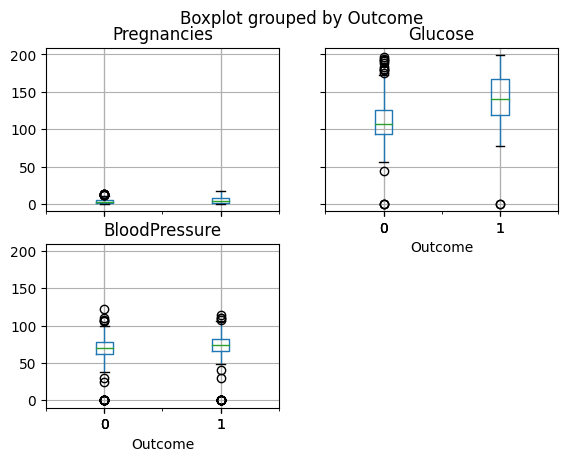

In [17]:
sugar_df.boxplot(column = features1, by='Outcome')

array([[<Axes: title={'center': 'SkinThickness'}, xlabel='Outcome'>,
        <Axes: title={'center': 'Insulin'}, xlabel='Outcome'>],
       [<Axes: title={'center': 'BMI'}, xlabel='Outcome'>, <Axes: >]],
      dtype=object)

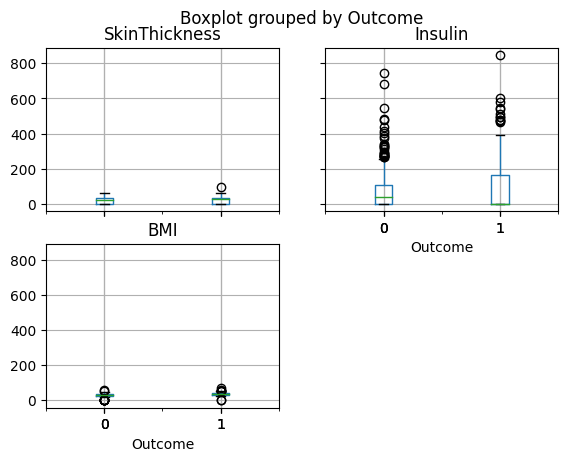

In [18]:
sugar_df.boxplot(column = features2, by='Outcome')

array([<Axes: title={'center': 'DiabetesPedigreeFunction'}, xlabel='Outcome'>,
       <Axes: title={'center': 'Age'}, xlabel='Outcome'>], dtype=object)

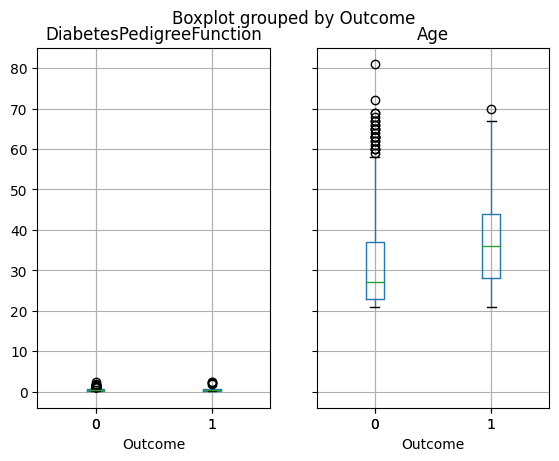

In [19]:
sugar_df.boxplot(column = features3, by='Outcome')

As seen from the boxplots, there are notable outliers within the dataset. This is particularly most evident in age, insulin, glucose, and blood pressure features. Due to the existence of outliers within features in the dataset, the most fitting data imputation method to be used would be by using the **median** of the features **based on their outcome** because medians are less sensitive to outliers.

`median()` is a helpful method to be used in order to get the median for each of the features.

In [20]:
sugar_df.groupby(['Outcome']).median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.0,107.0,70.0,21.0,39.0,30.05,0.336,27.0
1,4.0,140.0,74.0,27.0,0.0,34.25,0.449,36.0


However, since we are addressing the **existence of zero values** that are deemed inaccurate for their feature, we must use the previously splitted dataframes from before: *outcomezero_df* and *outcomeone_df* in order to use their medians since they have their zero values already set to null.

In [21]:
count_0 = (outcomezero_df == 0).sum()
count_1 = (outcomeone_df == 0).sum()

print('OutcomeZero Data Frame (Count for Zero): \n')
print(count_0, '\n')
print('OutcomeOne Data Frame (Count for Zero): \n')
print(count_1)

OutcomeZero Data Frame (Count for Zero): 

Pregnancies                  73
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64 

OutcomeOne Data Frame (Count for Zero): 

Pregnancies                 38
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64


Since we have already established that these data frames have their applicable features turned from zero to null. It is time to `replace()` the actual data frame's specific zero values to null for the applicable features.

In [22]:
features = ['Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
sugar_df.loc[:, features]= sugar_df[features].replace(0, np.NaN)

We can check the count for the zero values to make sure that the actual data frame to be transformed has their zero values set to null.

In [23]:
count_all = (sugar_df == 0).sum()
print('Actual Diabetes Dataframe: \n')
print(count_all, '\n')

Actual Diabetes Dataframe: 

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64 



`median()` will be used once again in order to find the medians of the respective data frames, so we can properly impute the values within the actual dataframe to be transformed based on its outcome value.

In [24]:
outcomezero_median = outcomezero_df.median()
outcomeone_median = outcomeone_df.median()

In [25]:
print("The following medians per outcome are the following:\n")
print("Outcome Zero Medians:")
print(outcomezero_median)
print("\nOutcome One Medians:")
print(outcomeone_median)


The following medians per outcome are the following:

Outcome Zero Medians:
Pregnancies                   2.000
Glucose                     107.000
BloodPressure                70.000
SkinThickness                27.000
Insulin                     102.500
BMI                          30.100
DiabetesPedigreeFunction      0.336
Age                          27.000
Outcome                       0.000
dtype: float64

Outcome One Medians:
Pregnancies                   4.000
Glucose                     140.000
BloodPressure                74.500
SkinThickness                32.000
Insulin                     169.500
BMI                          34.300
DiabetesPedigreeFunction      0.449
Age                          36.000
Outcome                       1.000
dtype: float64


Now, it is time to impute the null values of *sugar_df* with the medians based on a data entry's outcome by using `fillna()`.

In [26]:
sugar_df.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Finally, we can check for the presence of null values and the zero values of the actual data frame to verify if the imputation worked. As observed in the following outputs, the **imputation worked quite well and there are no presence of null values and inconsistent zero values** within the data frame.

In [27]:
features = ['Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
sugar_df.loc[sugar_df['Outcome'] == 0, features] = outcomezero_df[features].fillna(outcomezero_median)
sugar_df.loc[sugar_df['Outcome'] == 1, features] = outcomeone_df[features].fillna(outcomeone_median)
print("Checking for null values: \n")
print(sugar_df.isnull().any())
print("\nChecking for zero values:\n")
print((sugar_df == 0).sum())
print("\nThe Actual Data Frame After Imputation:\n")
sugar_df

Checking for null values: 

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Checking for zero values:

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

The Actual Data Frame After Imputation:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


Another data cleaning technique that can be explored for this dataset would be checking for extreme outliers. Checking for outliers, and figuring out if they should be dropped or not contributes to the overall data preprocessing stage when handling datasets. Outliers could have implications on standard variations and the distribution of the data. As previously seen in the boxplots, there are outliers in some of the features in the dataset. In the *sugar_df* data frame, we can use the `describe()` method to investigate the outliers further. As observed in the output, there are patricular entries of **min and max values that are far from the features' means**. This confirms our boxplot from beforehand that there are outliers that exist in the dataset.

In [28]:
sugar_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Handling extreme outliers would require meticulous consideration for the appropriate method chosen and the steps taken to treat these extreme outliers. We can generally check if we can use valid statistical techniques to check for these entries.

Combining the **Interquartile Range (IQR)** and **z-score** methods for detecting extreme outliers harnesses the strengths of both approaches to offer a nuanced analysis of data. The IQR method, which is robust against non-normal distributions, identifies outliers based on the middle 50% of the data, while the z-score method evaluates how far a data point is from the mean in a normally distributed set, pinpointing outliers as those with z-scores beyond ±3. This dual strategy ensures comprehensive outlier detection across various data distributions, effectively addressing the limitations of using either method in isolation.

In [29]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

extreme_outliers_df = pd.DataFrame()

for column in columns:
    # IQR method
    Q1 = sugar_df[column].quantile(0.25)
    Q3 = sugar_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound_extreme = Q1 - 3 * IQR
    upper_bound_extreme = Q3 + 3 * IQR

    # Z-score method
    mean = sugar_df[column].mean()
    std = sugar_df[column].std()
    sugar_df[column + '_Z_score'] = (sugar_df[column] - mean) / std

    # Combine IQR and Z-score for detecting extreme outliers
    current_extreme_outliers = sugar_df[((sugar_df[column] < lower_bound_extreme) |
                                         (sugar_df[column] > upper_bound_extreme)) |
                                        (abs(sugar_df[column + '_Z_score']) > 3)]

    extreme_outliers_df = pd.concat([extreme_outliers_df, current_extreme_outliers], axis=0).drop_duplicates()

# Drop Z-score columns to clean up the dataframe
extreme_outliers_df = extreme_outliers_df.drop(columns=[col + '_Z_score' for col in columns])


extreme_outliers_df = extreme_outliers_df.drop_duplicates()

extreme_outliers_df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1
455,14,175.0,62.0,30.0,169.5,33.6,0.212,38,1
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
43,9,171.0,110.0,24.0,240.0,45.4,0.721,54,1
106,1,96.0,122.0,27.0,102.5,22.4,0.207,27,0
125,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
549,4,189.0,110.0,31.0,102.5,28.5,0.680,37,0


In [30]:
sugar_df_no_extreme = sugar_df.copy()
sugar_df_no_extreme = sugar_df_no_extreme.drop(index=extreme_outliers_df.index)
sugar_df_no_extreme = sugar_df_no_extreme.drop(columns=['Pregnancies_Z_score','Glucose_Z_score','BloodPressure_Z_score','SkinThickness_Z_score','Insulin_Z_score','BMI_Z_score','DiabetesPedigreeFunction_Z_score','Age_Z_score'])
sugar_df = sugar_df.drop(columns=['Pregnancies_Z_score','Glucose_Z_score','BloodPressure_Z_score','SkinThickness_Z_score','Insulin_Z_score','BMI_Z_score','DiabetesPedigreeFunction_Z_score','Age_Z_score'])
sugar_df_no_extreme

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


As observed, we have **reduced the data entries** to `713 entries` for the dataset by using both **IQR and Z score** methods. Additionally, these outlier detection techniques can be especially useful when running the data through models after careful assessments and considerations given the context of the dataset. As suggested by Chang et al. (2022), these outliers could even be ignored altogether and we can just standardize the features. However, **since we are merely conducting exploratory data analysis**, we will still **explore** the nuances of the dataset **with these extreme outliers in the meantime**.

# **Section 3.** **Exploratory Data Analysis**

Exploratory Data Analysis (EDA) helps us in answering specific questions about our dataset, such as analyzing variable distributions, identifying outliers, and investigating relationships between variables. This thorough exploration uncovers hidden patterns and anomalies, establishing a solid foundation for our investigation. By engaging with these targeted EDA questions, we gain a deeper understanding of the dataset's characteristics and intricacies, which is crucial for formulating a precise and informed research question. The insights derived from this process ensure that our research question is not only relevant but also grounded in the empirical evidence within the data.

To begin our EDA, we will examine a general overview of the distributions of the features within the dataset through the help of the `hist()` method once again.

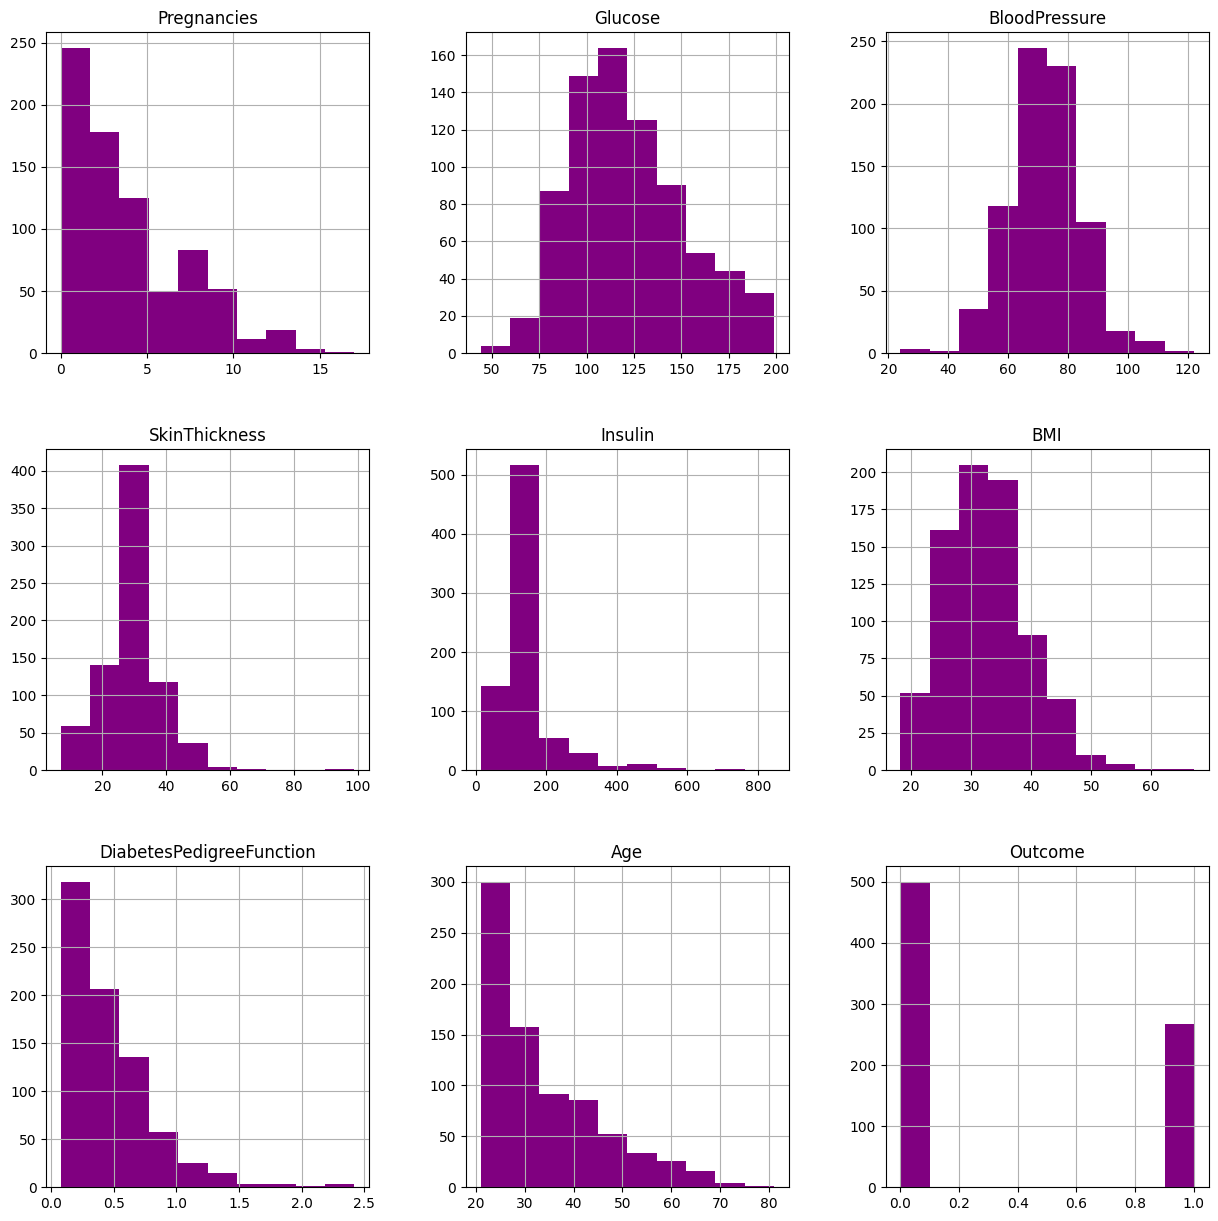

In [31]:
plot = sugar_df.hist(figsize = (15,15), color = 'purple')

From the histograms presented, we can infer several key insights. Firstly, the features tend to not have normal distribution and almost always have a presence of skewness. Secondly, it appears that within the dataset, a greater number of Pima Indian women are classified as not having diabetes compared to those who are diagnosed with the condition. Additionally, the data suggests a prevalence of younger women, and women who have had none or fewer pregnancies within the study group based on the skewness of the histograms.

## **Question 1**: Is there an underlying relationship between BMI and Diabetes outcome?

In [32]:
bmi_outcome = sugar_df[['BMI', 'Outcome']]
bmi_outcome.corr()

,BMI,Outcome
BMI,1.000000,0.315577
Outcome,0.315577,1.000000


The correlation table above among BMI and Diabetes Outcome shows that they have a correlation of 0.315577. We can say that there is a mild positive correlation between BMI and the Diabetic Outcome.

Text(0.5, 1.0, 'Relationship between BMI and Outcome')

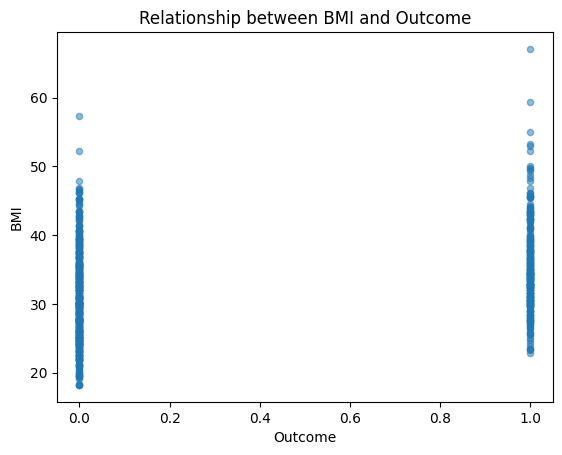

In [33]:
bmi_outcome.plot.scatter(x='Outcome', y='BMI', alpha = 0.5)
plt.title('Relationship between BMI and Outcome')

The scatter plot above, supports the previous description where BMI and Diabetic Outcome has a slight positive correlation. As we see that Diabetics generally have higher BMI.

## **Question 2**: How do glucose levels vary between distinct age groups? and are they correlated?

In [34]:
bins = [0, 30, 45,  60, 100]
labels = ['0-30', '31-45', '46-60', '61+']
sugar_df['AgeGroup'] = pd.cut(sugar_df['Age'], bins=bins, labels=labels, right=False)

AgeGroupCount = sugar_df['AgeGroup'].value_counts().sort_index()
AverageGlucose = sugar_df.groupby('AgeGroup')['Glucose'].mean()

AgeGroup_df = pd.DataFrame({'Count': AgeGroupCount, 'Average Glucose': AverageGlucose}).reset_index()
AgeGroup_df.columns = ['Age Groups', 'Count', 'Average Glucose']

print(AgeGroup_df)

  Age Groups  Count  Average Glucose
0       0-30    396       114.555556
1      31-45    239       126.334728
2      46-60    101       133.326733
3        61+     32       138.250000


These are the amount of individuals in each desginated age group, and their average glucose levels. To further show how they change over age, we will be using a bar graph.

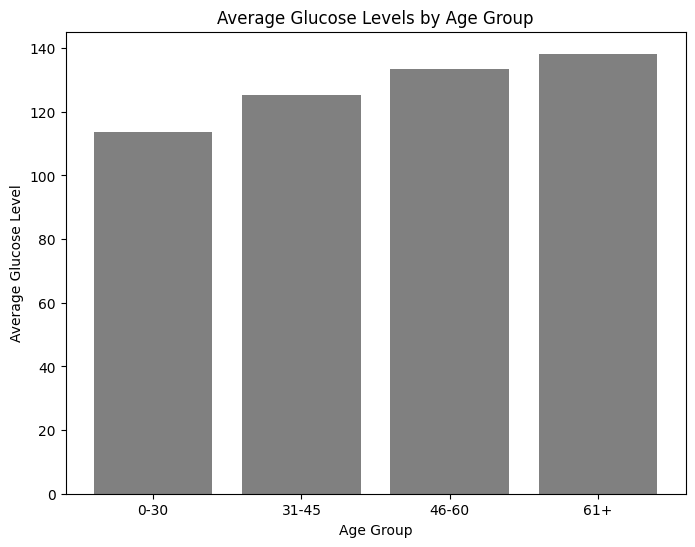

In [35]:
age_groups = ['0-30', '31-45', '46-60', '61+']
average_glucose = [113.744949, 125.163180, 133.326733, 138.250000]

plt.figure(figsize=(8, 6))
plt.bar(age_groups, average_glucose, color=['grey', 'grey', 'grey', 'grey'])

plt.title('Average Glucose Levels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Glucose Level')
plt.xticks(age_groups)
plt.show()

As per observation of the bar graph, it is evident that glucose levels rise as individuals age. The 396 individuals that are aged between 0 to 30 are the lowest of the group exhibiting an average glucose level of 113.74, meanwhile the 32 individuals who are aged 61 and above exhibit the highest average glucose level at 138.25. They are correlated in the sense that as individuals age, their glucose level also increase with them.

## **Question 3**: Which age group is the most prevalent with having diabetes?

In [36]:
diabetes_prevalence = sugar_df.groupby('AgeGroup')['Outcome'].mean()
print(diabetes_prevalence)

AgeGroup
0-30     0.212121
31-45    0.493724
46-60    0.564356
61+      0.281250
Name: Outcome, dtype: float64


The above code shows the diabetes prevalence between each age groups, and it is quite apparent that individuals aged between 46 to 60 are the most prevalent in terms of having diabetes with a prevelance of 0.5644. And that individuals aged between 0 to 30 are the lowest with the an average diabetes prevalence of 0.2121.

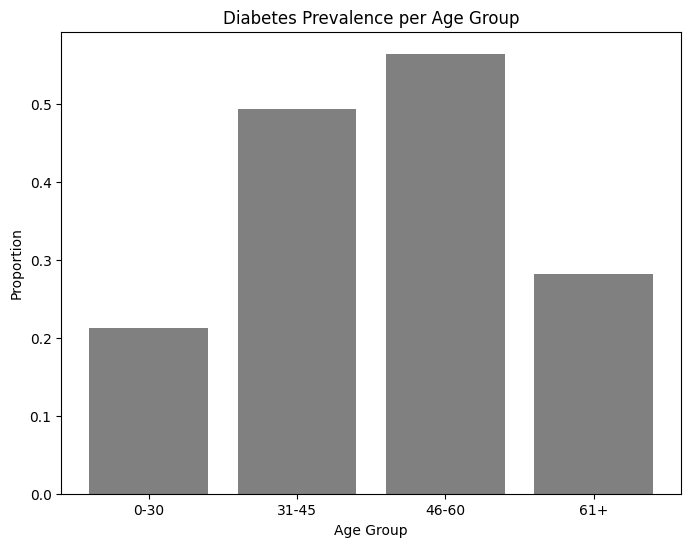

In [37]:
age_groups = ['0-30', '31-45', '46-60', '61+']
values = [0.212121, 0.493724, 0.564356, 0.281250]

plt.figure(figsize=(8, 6))
plt.bar(age_groups, values, color=['grey', 'grey', 'grey', 'grey'])

plt.title('Diabetes Prevalence per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(age_groups)

plt.show()

The bar graph above shows the prevalence of diabetes within each age group. This shows that there's a sudden spike in prevalence from age group 0-30 to 31-45, which also translates to age group 46-60.

## **Question 4**: Is blood pressure correlated with diabetes outcome?

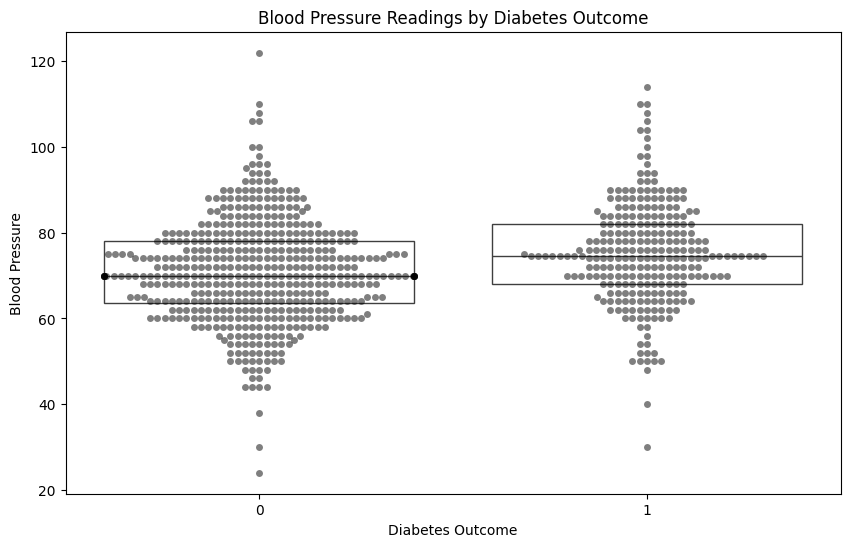

In [38]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Outcome', y='BloodPressure', data=sugar_df, color='k', alpha=0.5)
sns.boxplot(x='Outcome', y='BloodPressure', data=sugar_df, showcaps=False, boxprops={'facecolor':'None'}, showfliers=False, whiskerprops={'linewidth':0})
plt.title('Blood Pressure Readings by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Blood Pressure')
plt.show()

The swarm plot above shows the distribution of blood pressure readings by the diabetes outcome. By simple observation, their swarms seem to congregate in the same area which would suggest that blood pressure is not directly correlated to diabetes outcome.

In [39]:
correlation = pearsonr(sugar_df['BloodPressure'], sugar_df['Outcome'])

print(correlation)

PearsonRResult(statistic=0.17446877244887296, pvalue=1.1474575260266177e-06)


By virtue of the Pearson Correlation value being 0.0651 and the p value being 0.0715, this would suggest a very weak correlation between blood pressure and diabetes outcome. This would also imply that blood pressure alone is not indicative on the whether an individual has diabetes or not.

## **Question 5**: What are the average BMI values of those with Diabetes compared to those without Diabetes?

The block of code below outputs the statistical descriptions of the outcome being 1 (Diabetic) or 0 (Non Diabetic).

It outputs the following:

* Count
* Mean
* Standard Deviation
* Minimum Value
* 25% Percentile
* 50% Percentile
* 75% Percentile
* Maximum Value

In [40]:
bmi_outcome0 = sugar_df.loc[sugar_df['Outcome']  == 0, 'BMI'].describe()
bmi_outcome1 = sugar_df.loc[sugar_df['Outcome']  == 1, 'BMI'].describe()

print("BMI statistic of Outcome being 0:\n")
print(bmi_outcome0)

print("\nBMI statistic of Outcome being 1:\n")
print(bmi_outcome1)

BMI statistic of Outcome being 0:

count    500.000000
mean      30.846000
std        6.502089
min       18.200000
25%       25.750000
50%       30.100000
75%       35.300000
max       57.300000
Name: BMI, dtype: float64

BMI statistic of Outcome being 1:

count    268.000000
mean      35.398507
std        6.590852
min       22.900000
25%       30.900000
50%       34.300000
75%       38.775000
max       67.100000
Name: BMI, dtype: float64


We now visualize the data with a histogram showing the non Diabetics

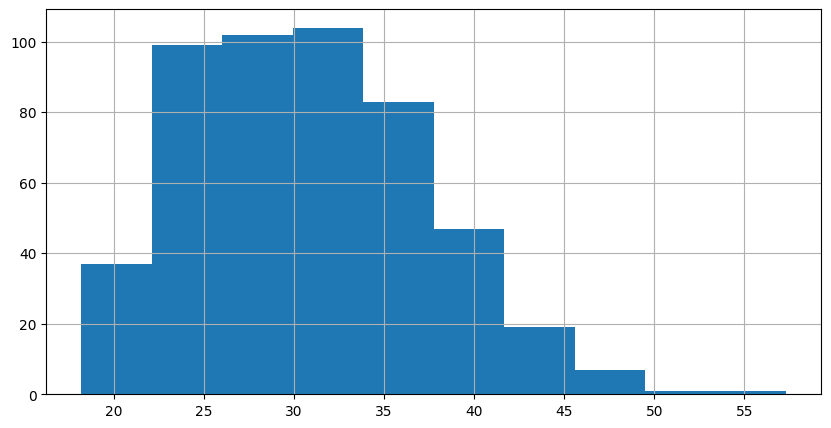

In [41]:
plotbmi0 = sugar_df.loc[sugar_df['Outcome']  == 0, 'BMI'].hist(figsize = (10, 5))

The histogram above that shows the distribution of non Diabetics have the most people around the range of 23 to 35.

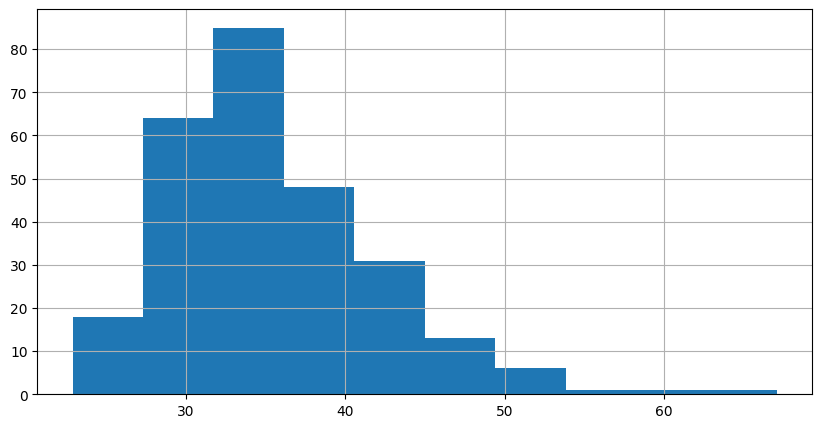

In [42]:
plotbmi1 = sugar_df.loc[sugar_df['Outcome']  == 1, 'BMI'].hist(figsize = (10, 5))

While the histogram above shows the distributon of diabetics which is around 32 to 36, thus it is generally a bit higher than non-Diabetics.

## **Question 6**: What is the prevalence of Diabetes across BMI categories?

The Bar Graph below visualizes the prevalence of the BMI categories namely: Underwight, Normal, Overweight, and Obese.

BMI
Underweight    0.000000
Normal         0.068627
Overweight     0.223464
Obese          0.457557
Name: Outcome, dtype: float64


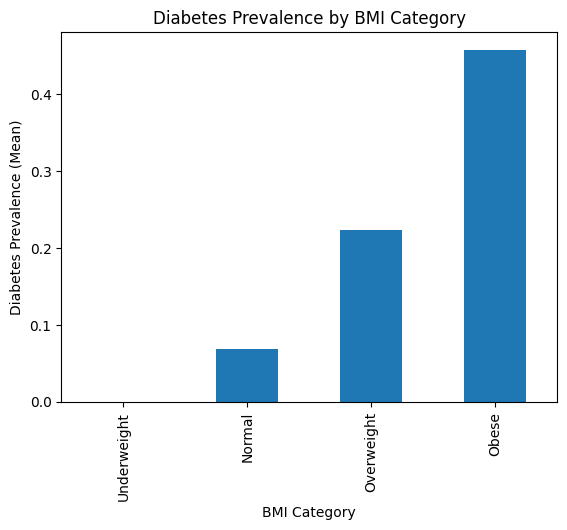

In [43]:
bins = [0, 18.5, 24.9, 29.9, sugar_df['BMI'].max()]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
bmi_df = sugar_df.copy()
bmi_df['BMI'] = pd.cut(bmi_df['BMI'], bins=bins, labels=labels)

prevalence = bmi_df.groupby('BMI')['Outcome'].mean()
print(prevalence)

prevalence.plot(kind='bar')
plt.title('Diabetes Prevalence by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Diabetes Prevalence (Mean)')
plt.show()

The Bar Graph shows that there are no underweight individuals that are diagnosed with Diabetes. Women around the normal range aren't entirely safe since there is a small amount of them that are still diagnosed with Diabetes with 0.068627 prevalence. While those categorized to be overweight have a quite significant higher prevalence, with 0.223464. The more extreme level (In terms of BMI) with Obese has a much higher prevalence with 0.457557 which has high prevalence.

## **Question 7**: What is the predictive accuracy of glucose levels alone, in identifying individuals at risk of developing diabetes?

We first take the correlation between Glucose and Diabetes Outcome.

In [44]:
glucose_df = sugar_df[['Glucose', 'Outcome']]
glucose_df.corr()

,Glucose,Outcome
Glucose,1.00000,0.49599
Outcome,0.49599,1.00000


As we can see, the correlation coefficient between Glucose and Diabetes Outcome is 0.49599 nearing 0.5. With this we can say that there is a weak to moderate correlation between Glucose and Diabetes Outcome.

Text(0.5, 1.0, 'Relationship between Glucose and Outcome')

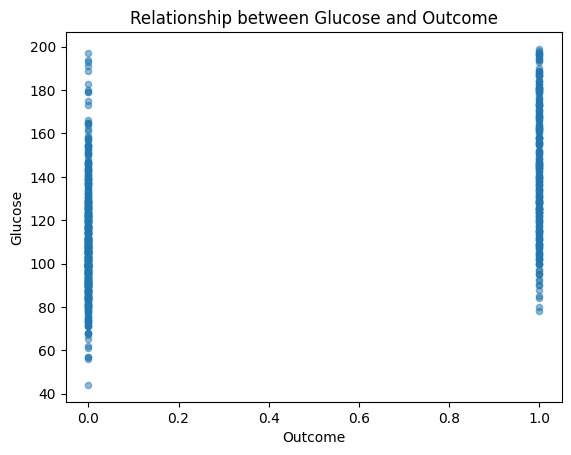

In [45]:
glucose_df.plot.scatter(x='Outcome', y='Glucose', alpha = 0.5)
plt.title('Relationship between Glucose and Outcome')

The previous description is supported by this scatter plot above, such that we can see there is a slight increase in Glucose levels for Diabetic Outcome.

We now show another visualization, using a box plot comparing Diabetic Outcomes and glucose levels.

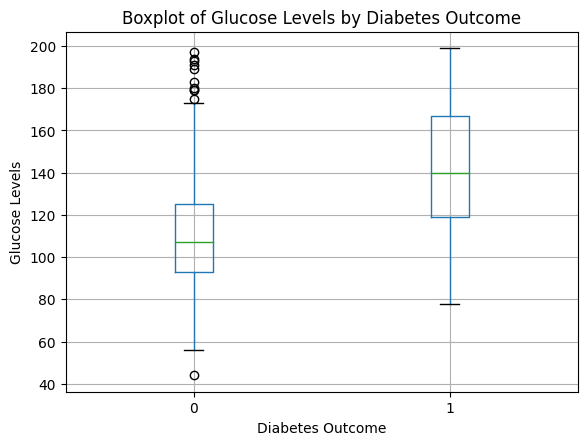

In [46]:
glucose_df.boxplot(column='Glucose', by='Outcome')
plt.suptitle('')
plt.title('Boxplot of Glucose Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose Levels')
plt.show()

With the box plot above we can make several observations. One is that the median of glucose levels of Diabetics is higher, with 140, compared to the non Diabetics which is around 110. The glucose levels are generally higher for Diabetics. However, we can see that there are some outliers that have high glucose levels among non Diabetic individuals.

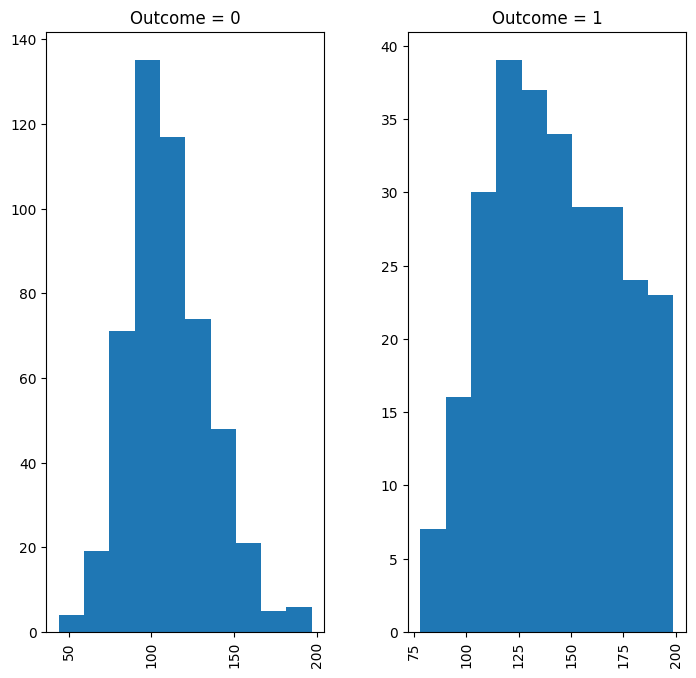

In [47]:
plot_glucose_df = sugar_df.hist(column='Glucose',by='Outcome',figsize = (8,8))
if plot_glucose_df.ndim > 1: # For 2D array of axes
    plot_glucose_df[0, 0].set_title('Outcome = 0')
    plot_glucose_df[1, 0].set_title('Outcome = 1')
else: # For 1D array of axes
    plot_glucose_df[0].set_title('Outcome = 0')
    plot_glucose_df[1].set_title('Outcome = 1')

plt.show()

With the histogram above, we can observe that most of the distributions are at the glucose values of 90 to 110 for those without diabetes while the distributions for those with diabetes concentrate in higher glucose values from 120 to 140.

## **Question 8**: Which features have high correlation with each other?

To start off with assessing the correleation between all features in the dataset, it is within best practice in exploratory data analysis to check for non-numerical data types to be omitted from the correlation visualizations.

In [48]:
numeric_columns = sugar_df.columns[sugar_df.dtypes != 'object']
string_columns = sugar_df.columns[sugar_df.dtypes == 'object']
print(f'There are {len(numeric_columns)} numeric columns & {len(string_columns)} string columns.')

There are 10 numeric columns & 0 string columns.


In [49]:
sugar_df.corr()

<ipython-input-49-c2a148601691>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sugar_df.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130155,0.209151,0.089028,0.058767,0.023890,-0.033523,0.544341,0.221898
Glucose,0.130155,1.000000,0.225141,0.229289,0.490015,0.236171,0.138353,0.268910,0.495990
BloodPressure,0.209151,0.225141,1.000000,0.199349,0.070128,0.286399,-0.001443,0.325135,0.174469
SkinThickness,0.089028,0.229289,0.199349,1.000000,0.200129,0.566086,0.106280,0.129537,0.295138
Insulin,0.058767,0.490015,0.070128,0.200129,1.000000,0.238443,0.146878,0.123629,0.377081
BMI,0.023890,0.236171,0.286399,0.566086,0.238443,1.000000,0.152771,0.027849,0.315577
DiabetesPedigreeFunction,-0.033523,0.138353,-0.001443,0.106280,0.146878,0.152771,1.000000,0.033561,0.173844
Age,0.544341,0.268910,0.325135,0.129537,0.123629,0.027849,0.033561,1.000000,0.238356
Outcome,0.221898,0.495990,0.174469,0.295138,0.377081,0.315577,0.173844,0.238356,1.000000


After creating a comprehensive table for correlation values, we can also make a correlation matrix in order to properly visualize the underlying patterns with regards to correlation between features.

<ipython-input-50-a70e5b648cea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = np.abs(numeric_df.corr())


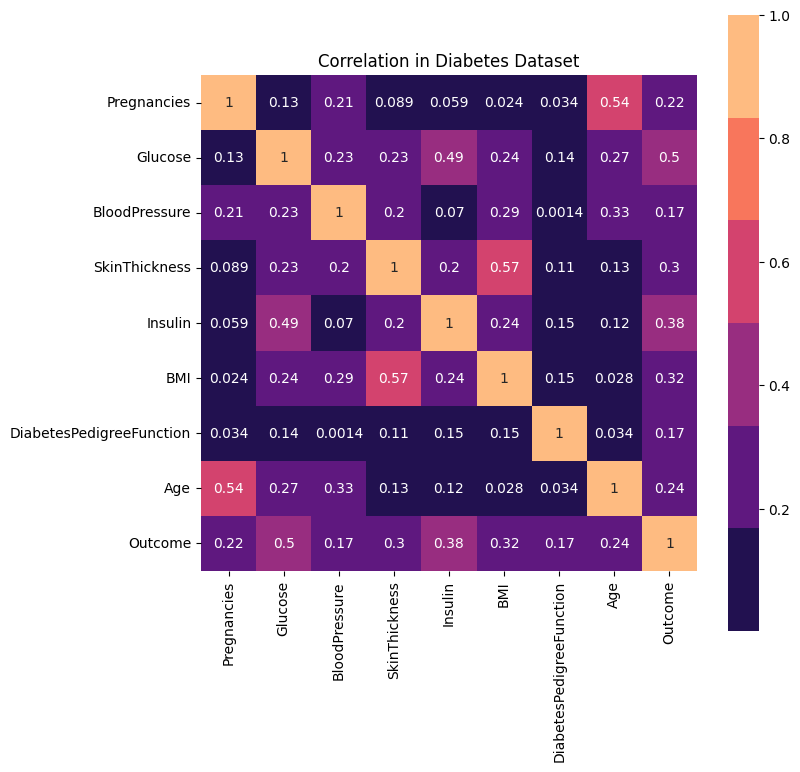

In [50]:
numeric_df = pd.DataFrame(data=sugar_df, columns=numeric_columns, index=sugar_df.index)
corr = np.abs(numeric_df.corr())
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.color_palette("magma")
sns.heatmap(corr, cmap=cmap, annot=True,square=True)
plt.title('Correlation in Diabetes Dataset')
plt.show()

Upon looking at the correlation matrix, it's evident that there is a range of relationships between various health indicators and diabetes outcomes. The matrix reveals how different factors, such as **Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI (Body Mass Index), Diabetes Pedigree Function, Age, and the Outcome** interrelate. Most notably, the matrix indicates that **Glucose levels** have a significant correlation with diabetes outcomes `(0.495990)`, suggesting that higher glucose levels might be a strong indicator of diabetes. Focusing more closely on **BMI**, its strongest correlation is with **Skin Thickness** `(0.566086)`, suggesting that higher body mass may be associated with more subcutaneous fat, a relevant factor in diabetes management and risk assessment. Interestingly, **BMI** also shows a moderate correlation with the outcome `(0.315577)`, indicating its significance in predicting diabetes alongside other variables like **Glucose and Insulin**. This emphasizes the importance of monitoring body weight as part of an approach to diabetes prevention and management, highlighting the interconnectedness of bodily measurements and biochemical markers in understanding and combating this condition.

# **Section 4.** **Research Question**

After assessing the features of the dataset, and exploring the information of specific variables, we decided on having our focus to be about the relationship between BMI and having diabetes.

Research Question: **How does body mass index (BMI) associate with having diabetes among adult women?**

## Why is this research question important?

Among the critical factors influencing women's health, the association between Body Mass Index (BMI) and the risk of developing diabetes in adult women is particularly impactful, touching on preventive health measures, lifestyle choices, and health care implications. BMI serves as a simple yet powerful indicator for assessing obesity and overweight status, which are potential risk factors for diabetes. Furthermore, this research question is essential in women's everyday lives as it empowers them with knowledge to make informed decisions about diet, physical activity, and lifestyle that support weight management and diabetes prevention.

## What is the significance of the research question?

In order to better understand how BMI impacts women's health, especially regarding diabetes, the research question remains as a relevant and significant undertaking. This research can help improve how we prevent and treat diabetes in women by looking at the link between a woman's weight and her risk of getting diabetes. Incorporating data modeling techniques also enables a more nuanced analysis of this relationship, offering insights that can guide personalized health advice and programs tailored specifically for women. By figuring out this connection with the help of advanced data analysis, we can create better-targeted interventions that encourage women to pay attention to their health by monitoring their weight and making healthy choices in their diet and exercise routines. This research contributes to the exploration of helping women avoid diabetes, leading to a healthier lifestyle for them and a decrease in diabetes cases overall, highlighting a step forward in ensuring women receive the care and information they need to stay healthy.

# **Section 5.** **References**

Aada, A., & Tiwari, S. (2019). Predicting diabetes in medical datasets using machine learning techniques. Int. J. Sci. Res. Eng. Trends, 5(2), 257-267.

Chang, V., Bailey, J., Xu, Q. A., & Sun, Z. (2022). Pima Indians diabetes mellitus classification based on machine learning (ML) algorithms. Neural Computing and Applications, 35(22), 16157-16173. https://doi.org/10.1007/s00521-022-07049-z

Linschoten, A. (2018, June 18). Diagnosing diabetes with weka & machine learning — Alex Strick van Linschoten. Alex Strick van Linschoten. https://www.alexstrick.com/blog/diagnosing-diabetes-with-weka-machine-learning

Schulz, L. O., Bennett, P. H., Ravussin, E., Kidd, J. R., Kidd, K. K., Esparza, J., & Valencia, M. E. (2006). Effects of traditional and western environments on prevalence of type 2 diabetes in Pima Indians in Mexico and the U.S. Diabetes Care, 29(8), 1866-1871. https://doi.org/10.2337/dc06-0138